<a href="https://colab.research.google.com/github/dhruv354/mnist/blob/main/Mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FUNCTIONAL API - KERAS**# New section

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, concatenate, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
import numpy as np
img_size = X_train.shape[1]
#reshapeing data according to requirements of convolutional layers
X_train = np.reshape(X_train, [-1, img_size, img_size, 1])
X_test = np.reshape(X_test, [-1, img_size, img_size, 1])
#normalizing the imagepixel values
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
X_train.shape[1:]

(28, 28, 1)

In [5]:
#building y-shape model
#left branch 
left_input = Input(shape=X_train.shape[1:])
y_left = left_input
filters = 16
for i in range(3):
  y_left = Conv2D(filters=filters, 
             kernel_size=(3, 3),
             padding='same', 
             activation='relu')(y_left)
  y_left = Dropout(0.3)(y_left)
  y_left = MaxPooling2D(pool_size=(2, 2))(y_left)
  filters *= 2

In [6]:
right_input = Input(shape=X_train.shape[1:])
y_right = right_input
filters = 16
for i in range(3):
  y_right = Conv2D(filters=filters, 
             kernel_size=(3, 3),
             padding='same', 
             activation='relu',
             dilation_rate=2)(y_right)
  y_right = Dropout(0.3)(y_right)
  y_right = MaxPooling2D(pool_size=(2, 2))(y_right)
  filters *= 2

In [7]:
y = concatenate([y_left, y_right])
y = Flatten()(y)
y = Dense(units=256, activation='relu')(y)
y = Dropout(0.3)(y)
outputs = Dense(units=10, activation='softmax')(y)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 16)   160         input_2[0][0]                    
______________________________________________________________________________________________

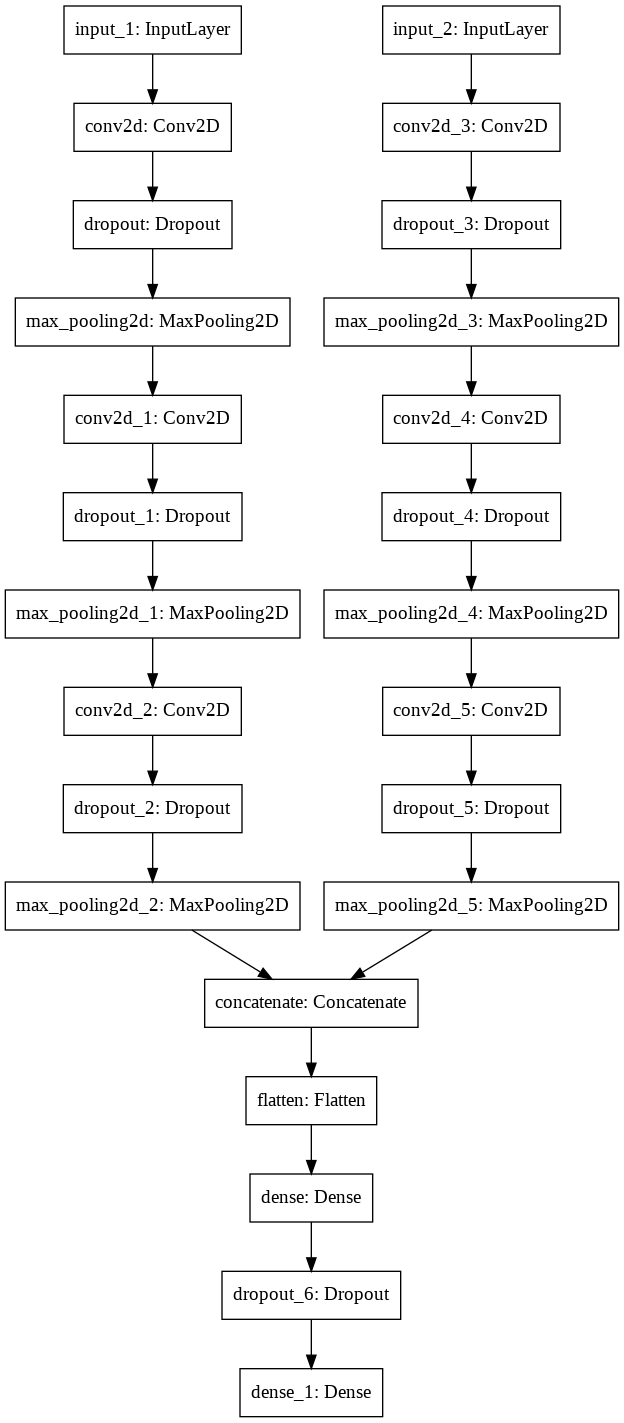

In [8]:
model = Model([left_input, right_input], outputs)
model.summary()
plot_model(model)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit([X_train, X_train],
                    y_train,
                    validation_data=([X_test, X_test], y_test),
                    epochs=20
                    )

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0454 - val_accuracy: 0.9921
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0555 - val_accuracy: 0.9898
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0506 - val_accuracy: 0.9921
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0401 - val_accuracy: 0.9902
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0306 - val_accuracy: 0.9916
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0294 - val_accuracy: 0.9923
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0281 - val_accuracy: